In [17]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Overfitting demo

## Creating Data

In [18]:
random.seed(98103)

n=30
x=pd.DataFrame([random.random() for i in range(n)],columns=['x']).sort_values(by='x').reset_index(drop=True)


y=x['x'].apply(lambda d: math.sin(4*d))

#add random gaussian noise

random.seed(1)
e=pd.Series([random.gauss(0,1/3.0) for i in range(n)])
y=y+e

data=pd.DataFrame({'Y':y, 'X1':x['x']})
#reverse columns
cols=data.columns.tolist()
cols=cols[-1:]+cols[:1]
data=data[cols]
data.head()

,Y,X1
0,0.587050,0.039579
1,0.648656,0.041568
2,0.307803,0.072432
3,0.310748,0.150289
4,0.237410,0.161334


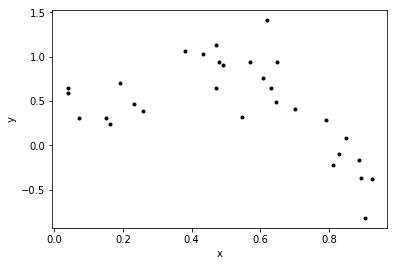

In [19]:
def plot_data(data):
    plt.plot( data['X1'],data['Y'], 'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

## define useful poly regression functions

define funct to create our features for a poly reg model of any degree

In [20]:
def polynomial_features(data, deg):
    data_copy= data.copy()
    for i in range(1, deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

define funct to fit model of deg

In [21]:
from sklearn.linear_model import LinearRegression

def poly_reg(data, deg):
    data_set=polynomial_features(data, deg)
    y=data_set['Y']
    x=data_set.loc[:, 'X1':]
    model= LinearRegression().fit(x,y)
    return model

In [22]:
def plot_poly_predictions(data, model):
    
    deg = len(model.coef_)
    
    #create predicitons points
    x_pred = pd.DataFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred, deg))
    
    #plot
    fig, ax=plt.subplots(1,1)
    plot_data(data)
    ax.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    ax.legend(loc='upper left')
    ax.axis([0,1,-1.5,2])


In [23]:
def print_coef(model):
    deg= len(model.coef_)
    w= list(np.append(model.intercept_,model.coef_))
    w.reverse()
    print('learned polynomial for degree {}:\n{}'.format(str(deg), np.poly1d(w)))


## fit and plot model

learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


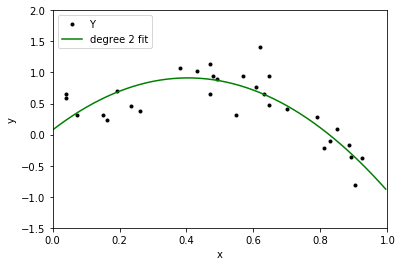

In [24]:
# 2nd Degree
model=poly_reg(data, 2 )

print_coef(model)

plot_poly_predictions(data, model)

learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


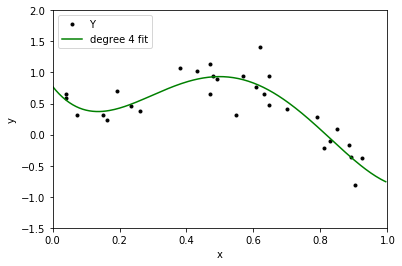

In [25]:
#4th Degree
model_4=poly_reg(data, 4)
print_coef(model_4)
plot_poly_predictions(data, model_4)

learned polynomial for degree 16:
           16             15             14             13
3.337e+08 x  - 2.225e+09 x  + 6.619e+09 x  - 1.156e+10 x 
              12             11             10             9
 + 1.309e+10 x  - 9.998e+09 x  + 5.137e+09 x  - 1.656e+09 x
              8             7             6             5             4
 + 2.252e+08 x + 6.714e+07 x - 4.739e+07 x + 1.394e+07 x - 2.549e+06 x
              3             2
 + 3.019e+05 x - 2.188e+04 x + 839.5 x - 12.01


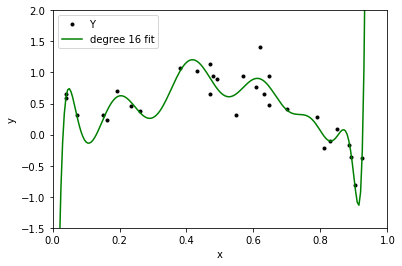

In [26]:
#16th degree

model16=poly_reg(data, 16)
print_coef(model16)
plot_poly_predictions(data, model16)

it is overfit: 
- coeff are way tho high
- too many features

avoid: by having many more data points

# Ridge Regression

Ridge regression aims to avoid overfitting by adding a cost to the RSS term of standard least squares that depends on the 2-norm of the coefficients $\|w\|$.  The result is penalizing fits with large coefficients.  The strength of this penalty, and thus the fit vs. model complexity balance, is controled by a parameter lambda (here called "L2_penalty").

In [27]:
from sklearn.linear_model import Ridge

def ridge_regression( data, deg, l2_penalty):
    data_set=polynomial_features(data,deg)
    y=data_set['Y']
    x=data_set.loc[:, 'X1':]
    model=Ridge(alpha=l2_penalty, copy_X=True).fit(x,y)
    return model

## perform ridge of fit deg 16th

learned polynomial for degree 16:
            16             15             14             13
-8.299e+05 x  + 4.439e+06 x  - 1.008e+07 x  + 1.177e+07 x 
              12             11             10             9
 - 4.786e+06 x  - 5.599e+06 x  + 7.513e+06 x  + 2.072e+06 x
              8             7             6             5             4
 - 1.221e+07 x + 1.332e+07 x - 7.954e+06 x + 2.942e+06 x - 6.865e+05 x
              3        2
 + 9.822e+04 x - 8001 x + 319.8 x - 4.174


C:\Users\Keulando\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.377172699276504e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


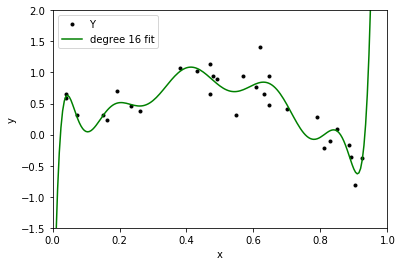

In [28]:
#small L2
model1=ridge_regression(data, deg=16, l2_penalty=1e-25)
print_coef(model1)

plot_poly_predictions(data,model1)

learned polynomial for degree 16:
          16           15           14           13           12
-0.03822 x  - 0.04265 x  - 0.04763 x  - 0.05321 x  - 0.05946 x 
            11           10           9           8          7
 - 0.06643 x  - 0.07416 x  - 0.08262 x - 0.09173 x - 0.1012 x
           6          5          4          3           2
 - 0.1103 x - 0.1179 x - 0.1214 x - 0.1158 x - 0.09251 x - 0.0412 x + 0.6399


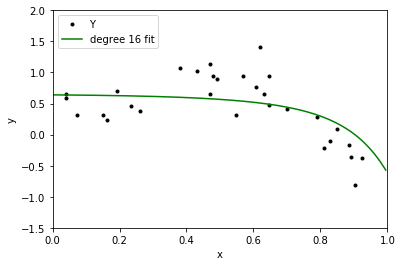

In [29]:
# large L2
model2=ridge_regression(data, deg=16, l2_penalty=10)
print_coef(model2)
plot_poly_predictions(data, model2)

C:\Users\Keulando\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.377172699276504e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


 lambda 1e-25
learned polynomial for degree 16:
            16             15             14             13
-8.299e+05 x  + 4.439e+06 x  - 1.008e+07 x  + 1.177e+07 x 
              12             11             10             9
 - 4.786e+06 x  - 5.599e+06 x  + 7.513e+06 x  + 2.072e+06 x
              8             7             6             5             4
 - 1.221e+07 x + 1.332e+07 x - 7.954e+06 x + 2.942e+06 x - 6.865e+05 x
              3        2
 + 9.822e+04 x - 8001 x + 319.8 x - 4.174
--------------------------------------------------

 lambda 1e-10
learned polynomial for degree 16:
      16        15        14         13        12        11         10
7567 x  - 7803 x  - 6900 x  + 714.5 x  + 6541 x  + 5802 x  - 498.1 x 
         9        8        7        6        5         4         3
 - 6056 x - 4252 x + 3439 x + 4893 x - 4281 x + 769.9 x + 100.6 x
          2
 - 11.39 x - 4.716 x + 0.7859
--------------------------------------------------

 lambda 1e-06
learned polynomial f

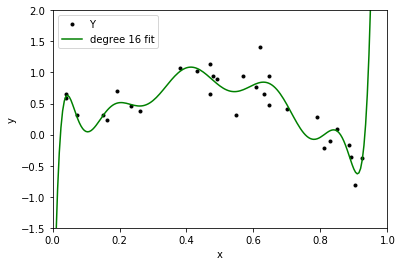

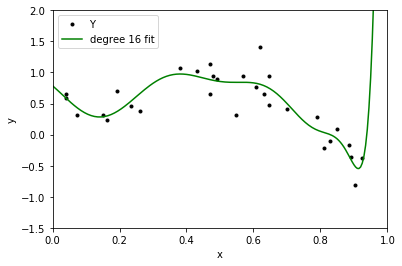

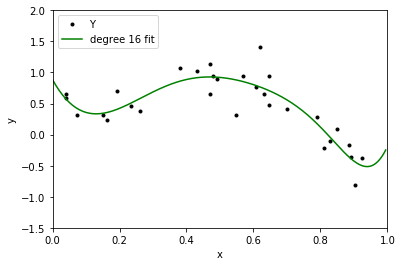

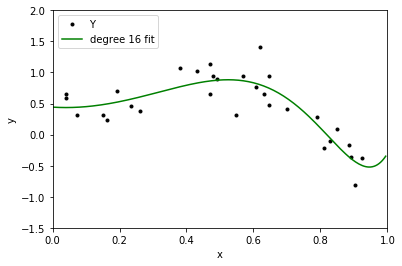

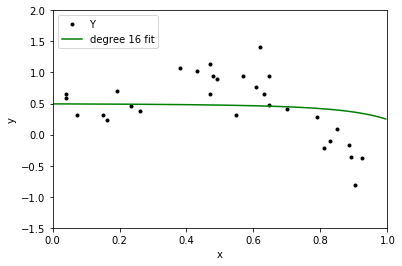

In [30]:
for l2_pena in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model=ridge_regression(data, 16, l2_penalty=l2_pena)
    print(' lambda {:.0e}'.format(l2_pena))
    print_coef(model)

    
    plot_poly_predictions(data, model)
    print('--------------------------------------------------\n')    

## perform Cross validation using LOO ( leave on out) method

In [31]:
def LOO_CV(data, deg, l2_penalty_values):
    from sklearn.model_selection import KFold
    
    data = polynomial_features(data,deg)
    xx=data.loc[:, 'X1':]
    yy=data['Y']
    
    #create as many folds for cv as data points
    num_folds = len(data)
    folds = KFold(n_splits=num_folds).split(xx,yy) # creates indices to use for the split in train,test 
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse  = []
    min_mse         = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse=0.0 #init mse var
        for train_idx, valid_idx in folds:
            
            #slice data df in train and valid
            train=data.iloc[train_idx] 
            valid=data.iloc[valid_idx]
            
            #make x,y for train and test
            X_train = train.loc[:,'X1':]
            y_train = train['Y']
            X_valid = valid.loc[:, 'X1':]
            y_valid = valid['Y']
            
            #train model
            model = Ridge(alpha=l2_penalty).fit(X_train, y_train)
            #predict on valid set
            y_valid_predicted = model.predict(X_valid)
            #compute suqarred error
            next_mse += ((y_valid_predicted - y_valid)**2).sum()
            #print('Current MSE is: {:.3f}'.format(next_mse))
        #save squarred error in list of mse for each l2Pen
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse<min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty

    return l2_penalty_mse, best_l2_penalty

In [33]:
# use KFold method to split the data
train_valid_shuffled=pd.read_csv('wk3_kc_house_train_valid_shuffled.csv')
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1)
    print(i, (start, end))
    
train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4,2.50,2800,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580,5900
1,1703050500,20150321T000000,645000.0,3,2.50,2490,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2,5700002325,20140605T000000,640000.0,3,1.75,2340,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360,4725
3,475000510,20141118T000000,594000.0,3,1.00,1320,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700,5000
4,844001052,20150128T000000,365000.0,4,2.50,1904,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560,12426
5,2781280290,20150427T000000,305000.0,3,2.50,1610,3516,2.0,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610,3056
6,2214800630,20141105T000000,239950.0,3,2.25,1560,8280,2.0,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920,8120
7,2114700540,20141021T000000,366000.0,3,2.50,1320,4320,1.0,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190,4200
8,2596400050,20140730T000000,375000.0,3,1.00,1960,7955,1.0,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850,8219
9,4140900050,20150126T000000,440000.0,4,1.75,2180,10200,1.0,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590,10445


In [ ]:
l2_penalty_values = np.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = LOO_CV(data, 16, l2_penalty_values)

In [ ]:
best_l2_penalty

In [ ]:
model_loo=ridge_regression(data,16, l2_penalty=best_l2_penalty)
print_coef(model_loo)
plot_poly_predictions(data, model_loo)


# Lasso Regression

Lasso regression jointly shrinks coefficients to avoid overfitting, and implicitly performs feature selection by setting some coefficients exactly to 0 for sufficiently large penalty strength lambda (here called "L1_penalty").  In particular, lasso takes the RSS term of standard least squares and adds a 1-norm cost of the coefficients $\|w\|$.

Define our function to solve the lasso objective for a polynomial regression model of any degree:

In [35]:
from sklearn.linear_model import Lasso

def lasso_regression(data, deg, l1_penalty):
    
    data_set=polynomial_features(data, deg)
    y=data_set['Y']
    x=data_set.loc[:, 'X1':]
    model = Lasso(alpha=l1_penalty).fit(x,y)
    return model

C:\Users\Keulando\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


L1 penalty = 1.00e-04
number of nonzeros = 13
learned polynomial for degree 16:
        16         15          14          13          12          11
0.1254 x  + 0.436 x  + 0.7122 x  + 0.3223 x  + 0.1945 x  + 0.2729 x 
           10     6         5         4         3        2
 + 0.1514 x  - 0 x - 1.128 x - 3.473 x - 2.418 x + 4.13 x - 0.02906 x + 0.4109
------------------------------------------------

L1 penalty = 5.00e-03
number of nonzeros = 3
learned polynomial for degree 16:
        5     4     3
-2.538 x - 0 x - 0 x + 0.694 x + 0.4935
------------------------------------------------

L1 penalty = 1.00e-01
number of nonzeros = 1
learned polynomial for degree 16:
 
0.4527
------------------------------------------------

L1 penalty = 6.71e-03
number of nonzeros = 3
learned polynomial for degree 16:
       5     4     3
-2.34 x - 0 x - 0 x + 0.5465 x + 0.5394
------------------------------------------------



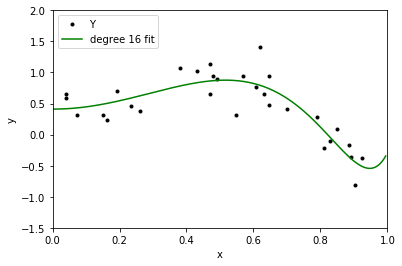

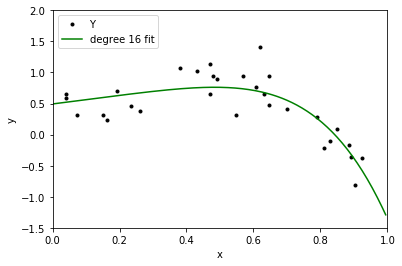

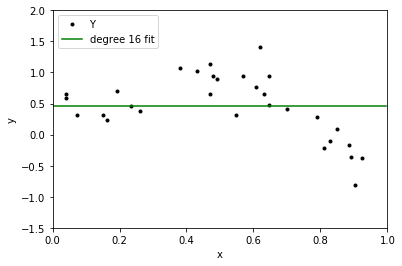

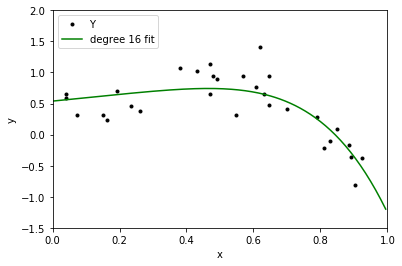

In [36]:
for l1_penalty in [0.0001, 0.005,  0.1, 0.00671]:
    model=lasso_regression(data, 16, l1_penalty=l1_penalty)
    #sum of NonZero
    func=np.vectorize(lambda x: 1 if x!=0 else 0)
    nnz=func([model.intercept_] + list(model.coef_)).sum()
                           
    print('L1 penalty = {:.2e}'.format(l1_penalty))
    print('number of nonzeros = {}'.format(nnz))
    print_coef(model)
    print('------------------------------------------------\n')
    plot_poly_predictions(data, model)
    #plt.tile('lasso')


Above: We see that as lambda increases, we get sparser and sparser solutions.  However, even for our non-sparse case for lambda=0.0001, the fit of our high-order polynomial is not too wild.  This is because, like in ridge, coefficients included in the lasso solution are shrunk relative to those of the least squares (unregularized) solution.  This leads to better behavior even without sparsity.  Of course, as lambda goes to 0, the amount of this shrinkage decreases and the lasso solution approaches the (wild) least squares solution.